In [10]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np


In [11]:
PL_dataframe = pd.read_csv("../Data/Raw/PremierLeague.csv")
PL_dataframe.head()

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,NaN,Arsenal,Coventry,0,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,1993-1994_Aston Villa_QPR,1993-1994,1,1993-08-14,NaN,Aston Villa,QPR,4,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,1993-1994_Chelsea_Blackburn,1993-1994,1,1993-08-14,NaN,Chelsea,Blackburn,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,1993-1994_Liverpool_Sheffield Weds,1993-1994,1,1993-08-14,NaN,Liverpool,Sheffield Weds,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
4,1993-1994_Man City_Leeds,1993-1994,1,1993-08-14,NaN,Man City,Leeds,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [12]:
print(PL_dataframe.shape)
PL_dataframe.columns

(12160, 43)


Index(['MatchID', 'Season', 'MatchWeek', 'Date', 'Time', 'HomeTeam',
       'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
       'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots',
       'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners',
       'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'],
      dtype='object')

In [13]:
PL_dataframe.isnull().sum().sort_values(ascending= False)

Time                      9880
MarketAvgHomeTeam         9880
MarketMaxAwayTeam         9880
MarketAvgOver2.5Goals     9880
MarketAvgUnder2.5Goals    9880
MarketMaxDraw             9880
MarketMaxHomeTeam         9880
MarketMaxUnder2.5Goals    9880
MarketMaxOver2.5Goals     9880
MarketAvgAwayTeam         9880
MarketAvgDraw             9880
B365Over2.5Goals          8877
B365Under2.5Goals         8877
B365HomeTeam              3420
B365AwayTeam              3420
B365Draw                  3420
AwayTeamCorners           2660
AwayTeamShots             2660
HomeTeamYellowCards       2660
Referee                   2660
HomeTeamShotsOnTarget     2660
AwayTeamRedCards          2660
HomeTeamRedCards          2660
HomeTeamFouls             2660
AwayTeamFouls             2660
AwayTeamYellowCards       2660
HomeTeamShots             2660
HomeTeamCorners           2660
AwayTeamShotsOnTarget     2660
HalfTimeAwayTeamGoals      760
HalfTimeHomeTeamGoals      760
HalfTimeResult             760
FullTime

<Axes: >

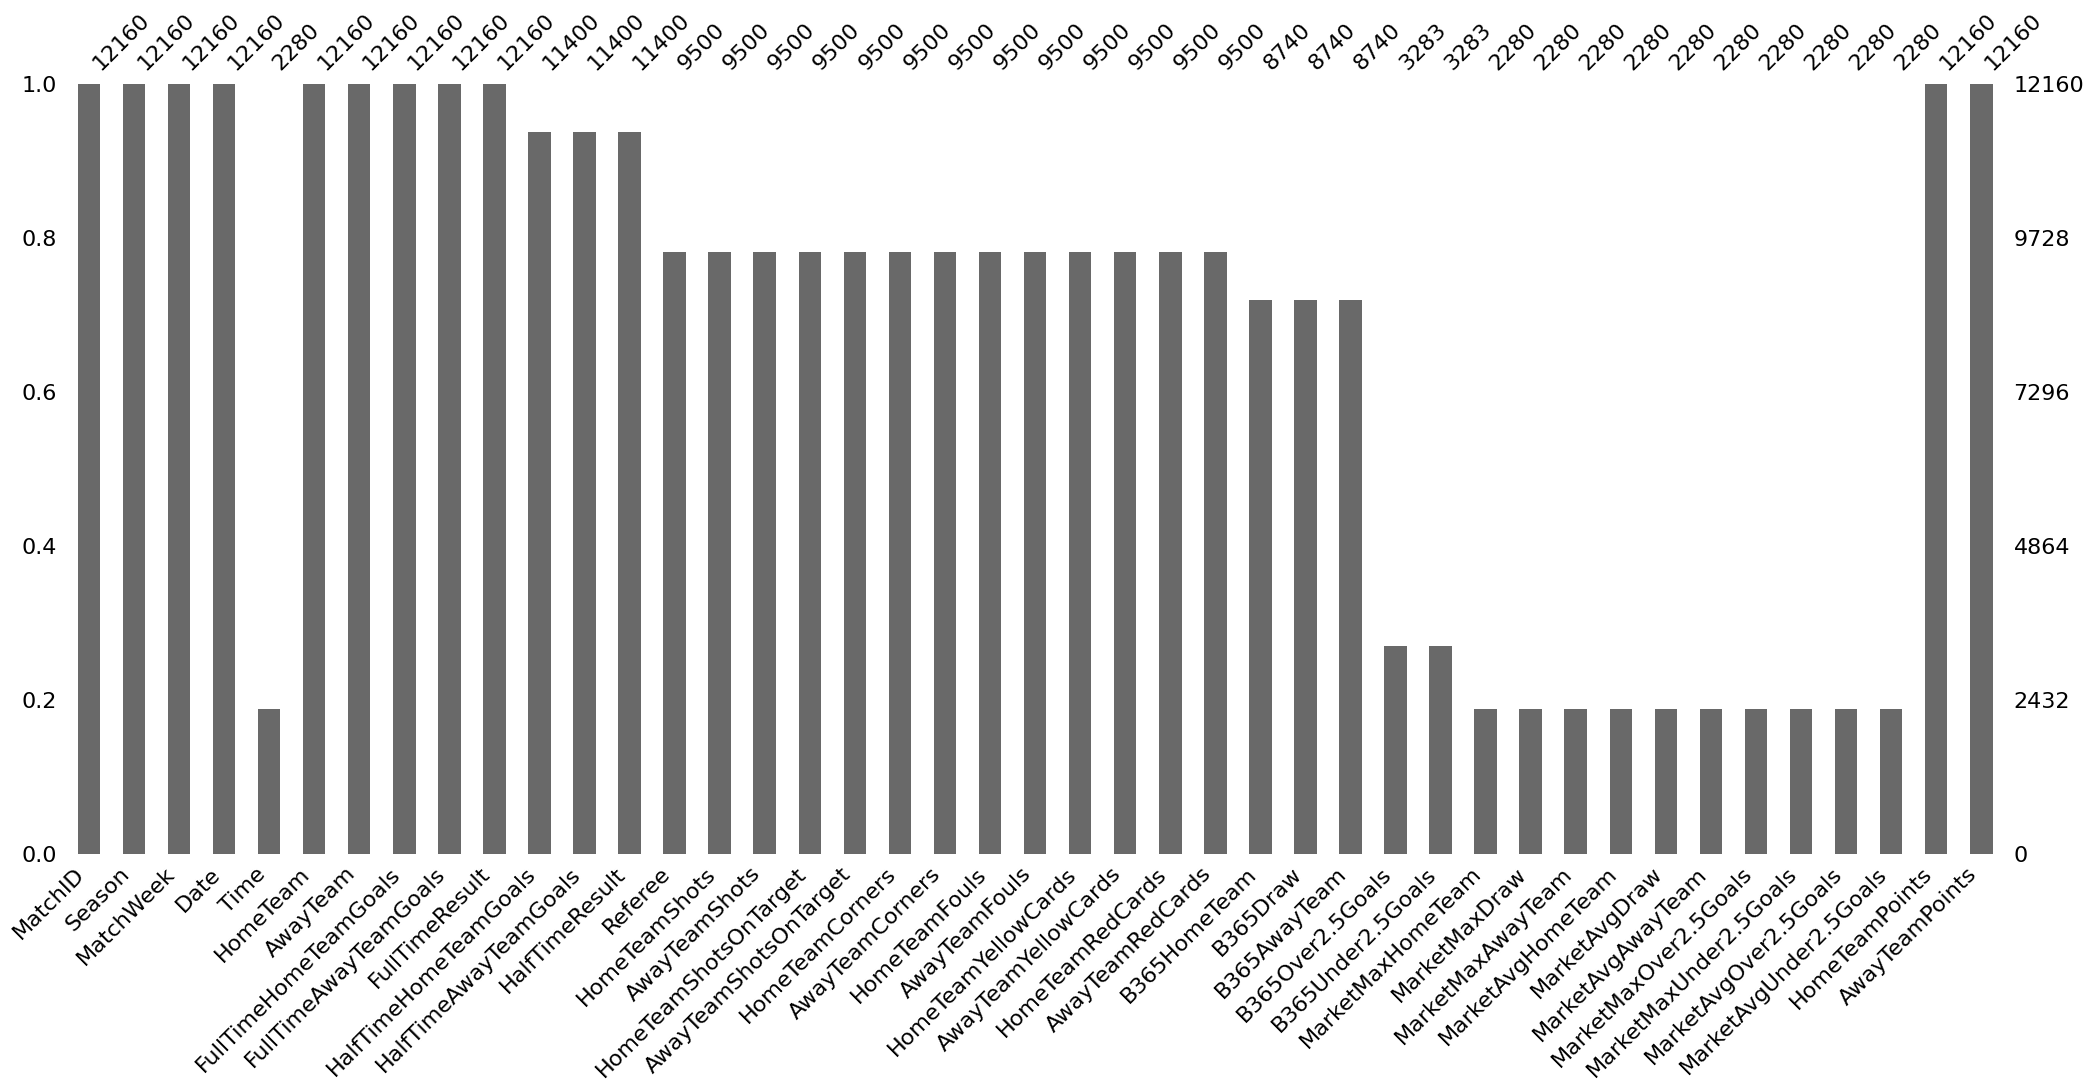

In [14]:
msno.bar(PL_dataframe)

In [15]:
columns_to_keep = ['MatchID', 'Season', 'MatchWeek', 'Date', 'HomeTeam', 'AwayTeam',
                   'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals']
PL_dataframe = PL_dataframe[columns_to_keep]
print(PL_dataframe.shape)
PL_dataframe['Date'] = pd.to_datetime(PL_dataframe['Date'])
PL_dataframe = PL_dataframe.sort_values('Date')
PL_dataframe
PL_dataframe.to_csv(r"C:\Users\hpvic\Desktop\FJ\Personal\Python\Premier-League_Elo-Ratings\Data\Processed\Updated PL_Dataframe.csv", index = False)

(12160, 8)


<Axes: >

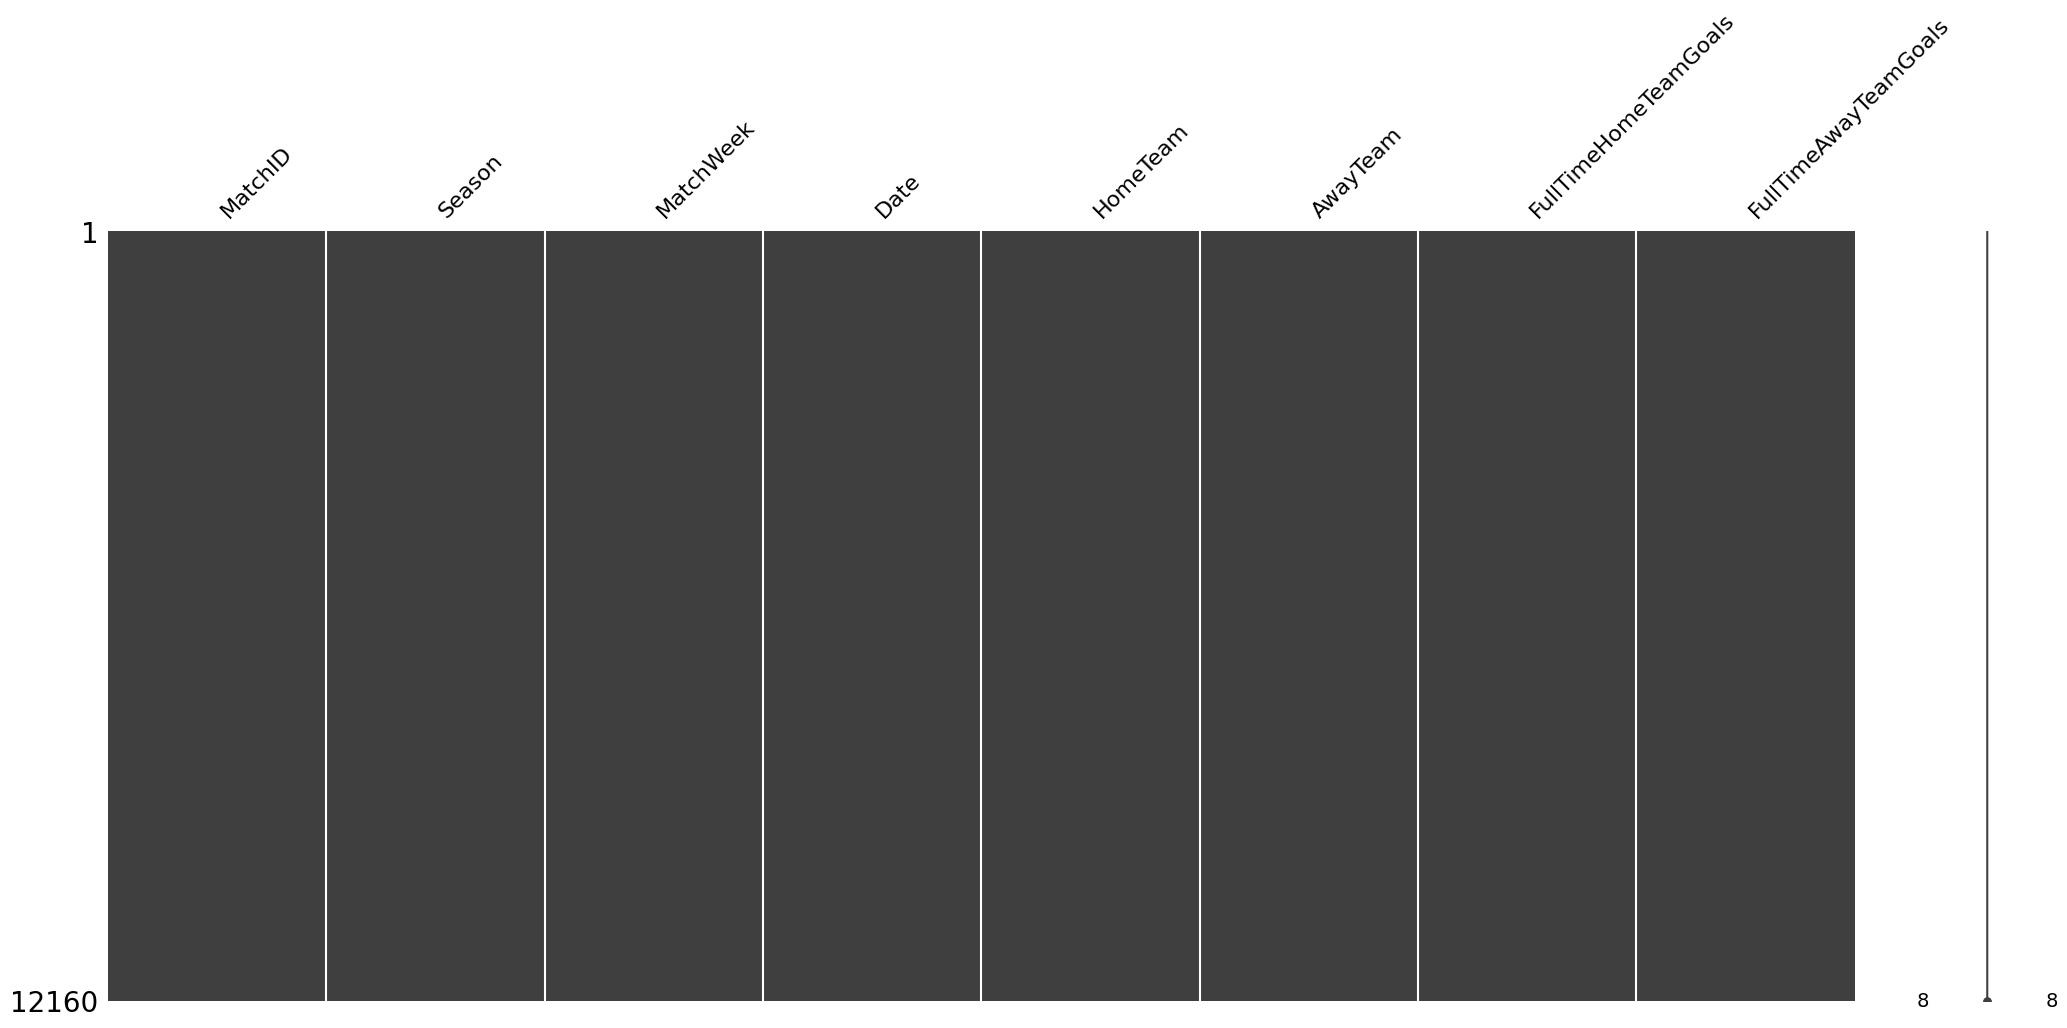

In [16]:
msno.matrix(PL_dataframe)

In [17]:
home_teams = PL_dataframe['HomeTeam'].unique()
away_teams = PL_dataframe['AwayTeam'].unique()
all_unique_teams = set(np.concatenate([home_teams, away_teams]))
print(all_unique_teams)
len(all_unique_teams)

{'Liverpool', 'Barnsley', 'Watford', 'Sheffield Weds', 'Blackpool', 'Cardiff', 'Huddersfield', 'Oldham', 'Luton', 'Birmingham', 'Man City', 'Coventry', 'QPR', "Nott'm Forest", 'Bolton', 'Wigan', 'Portsmouth', 'Southampton', 'Man United', 'Leeds', 'Blackburn', 'West Ham', 'Burnley', 'Hull', 'Crystal Palace', 'Norwich', 'Swindon', 'Leicester', 'Newcastle', 'Brighton', 'Swansea', 'Stoke', 'Fulham', 'West Brom', 'Wolves', 'Aston Villa', 'Ipswich', 'Everton', 'Charlton', 'Bournemouth', 'Chelsea', 'Arsenal', 'Tottenham', 'Wimbledon', 'Derby', 'Sunderland', 'Reading', 'Sheffield United', 'Brentford', 'Bradford', 'Middlesbrough'}


51

In [34]:
#Coding the Elo-logic
elo_ratings = {team: 1500 for team in all_unique_teams}
print(elo_ratings)
def updating_elo(home_team, away_team, winner):
    home_team_rating = elo_ratings[home_team]
    away_team_rating = elo_ratings[away_team]
    
    expected_home_team_score = 1 / (1 + 10**((away_team_rating - home_team_rating) / 400))
    expected_away_team_score = 1 - expected_home_team_score
    
    actual_result_for_home_team = 1 if winner == home_team else 0 if winner == away_team else 0.5
    actual_result_for_away_team = 1 - actual_result_for_home_team

    updated_home_team_ratings = home_team_rating + 30*(actual_result_for_home_team - expected_home_team_score)
    updated_away_team_ratings = away_team_rating + 30*(actual_result_for_away_team - expected_away_team_score )

    elo_ratings[home_team] = updated_home_team_ratings
    elo_ratings[away_team] = updated_away_team_ratings


{'Liverpool': 1500, 'Barnsley': 1500, 'Watford': 1500, 'Sheffield Weds': 1500, 'Blackpool': 1500, 'Cardiff': 1500, 'Huddersfield': 1500, 'Oldham': 1500, 'Luton': 1500, 'Birmingham': 1500, 'Man City': 1500, 'Coventry': 1500, 'QPR': 1500, "Nott'm Forest": 1500, 'Bolton': 1500, 'Wigan': 1500, 'Portsmouth': 1500, 'Southampton': 1500, 'Man United': 1500, 'Leeds': 1500, 'Blackburn': 1500, 'West Ham': 1500, 'Burnley': 1500, 'Hull': 1500, 'Crystal Palace': 1500, 'Norwich': 1500, 'Swindon': 1500, 'Leicester': 1500, 'Newcastle': 1500, 'Brighton': 1500, 'Swansea': 1500, 'Stoke': 1500, 'Fulham': 1500, 'West Brom': 1500, 'Wolves': 1500, 'Aston Villa': 1500, 'Ipswich': 1500, 'Everton': 1500, 'Charlton': 1500, 'Bournemouth': 1500, 'Chelsea': 1500, 'Arsenal': 1500, 'Tottenham': 1500, 'Wimbledon': 1500, 'Derby': 1500, 'Sunderland': 1500, 'Reading': 1500, 'Sheffield United': 1500, 'Brentford': 1500, 'Bradford': 1500, 'Middlesbrough': 1500}


In [35]:
elo_ratings = {team: 1500 for team in all_unique_teams}
print(elo_ratings)

#Making elo ratings history list
elo_ratings_history = []

for index, row in PL_dataframe.iterrows():
    #Before match started
    season = row['Season']
    matchweek = row['MatchWeek']
    date = row['Date']
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    ft_home_goals = row['FullTimeHomeTeamGoals']
    ft_away_goals = row['FullTimeAwayTeamGoals']
    home_team_elo_before_match = elo_ratings[home_team]
    away_team_elo_before_match = elo_ratings[away_team]

    if ft_home_goals > ft_away_goals:
        winner = home_team
    elif ft_home_goals < ft_away_goals:
        winner = away_team
    else:
        winner = None
    
    updating_elo(home_team, away_team, winner)
    
    #After match result, new elo-ratings of each team
    home_team_elo_after_match = elo_ratings[home_team]
    away_team_elo_after_match = elo_ratings[away_team]

    elo_ratings_history.extend([{
        "Season": season,
        "MatchWeek": matchweek,
        "Date": date,
        "Team": home_team,
        "Full Time Goals": ft_home_goals,
        "Elo-rating before match": round(home_team_elo_before_match, 2),
        "Elo-rating after match": round(home_team_elo_after_match, 2)
    },
        {
        "Season": season,
        "MatchWeek": matchweek,
        "Date": date,
        "Team": away_team,
        "Full Time Goals": ft_away_goals,
        "Elo-rating before match": round(away_team_elo_before_match, 2),
        "Elo-rating after match": round(away_team_elo_after_match, 2)
    }])



{'Liverpool': 1500, 'Barnsley': 1500, 'Watford': 1500, 'Sheffield Weds': 1500, 'Blackpool': 1500, 'Cardiff': 1500, 'Huddersfield': 1500, 'Oldham': 1500, 'Luton': 1500, 'Birmingham': 1500, 'Man City': 1500, 'Coventry': 1500, 'QPR': 1500, "Nott'm Forest": 1500, 'Bolton': 1500, 'Wigan': 1500, 'Portsmouth': 1500, 'Southampton': 1500, 'Man United': 1500, 'Leeds': 1500, 'Blackburn': 1500, 'West Ham': 1500, 'Burnley': 1500, 'Hull': 1500, 'Crystal Palace': 1500, 'Norwich': 1500, 'Swindon': 1500, 'Leicester': 1500, 'Newcastle': 1500, 'Brighton': 1500, 'Swansea': 1500, 'Stoke': 1500, 'Fulham': 1500, 'West Brom': 1500, 'Wolves': 1500, 'Aston Villa': 1500, 'Ipswich': 1500, 'Everton': 1500, 'Charlton': 1500, 'Bournemouth': 1500, 'Chelsea': 1500, 'Arsenal': 1500, 'Tottenham': 1500, 'Wimbledon': 1500, 'Derby': 1500, 'Sunderland': 1500, 'Reading': 1500, 'Sheffield United': 1500, 'Brentford': 1500, 'Bradford': 1500, 'Middlesbrough': 1500}


In [20]:
# Converting Elo-ratings history into a dataframe
# pd.set_option("display.max_rows", None)
elo_ratings_history_df = pd.DataFrame(elo_ratings_history)
elo_ratings_history_df['Date'] = pd.to_datetime(elo_ratings_history_df['Date'])
elo_ratings_history_df.head()


,Season,MatchWeek,Date,Team,Full Time Goals,Elo-rating before match,Elo-rating after match
0,1993-1994,1,1993-08-14,Arsenal,0,1500.0,1485.0
1,1993-1994,1,1993-08-14,Coventry,3,1500.0,1515.0
2,1993-1994,1,1993-08-14,Aston Villa,4,1500.0,1515.0
3,1993-1994,1,1993-08-14,QPR,1,1500.0,1485.0
4,1993-1994,1,1993-08-14,Chelsea,1,1500.0,1485.0


In [21]:
print(elo_ratings)

{'Liverpool': 1788.2770668776732, 'Barnsley': 1430.1729410510375, 'Watford': 1386.1466375080784, 'Sheffield Weds': 1445.0393911344781, 'Blackpool': 1482.784291597174, 'Cardiff': 1444.7767440397186, 'Huddersfield': 1352.6072487329902, 'Oldham': 1463.6355620487109, 'Luton': 1427.7986121793654, 'Birmingham': 1490.7920108420692, 'Man City': 1785.0912947509762, 'Coventry': 1442.280321836186, 'QPR': 1412.5554312388342, "Nott'm Forest": 1625.8158544763699, 'Bolton': 1483.7860064416318, 'Wigan': 1504.682658989941, 'Portsmouth': 1436.357519499149, 'Southampton': 1334.1592624669008, 'Man United': 1553.6153212594368, 'Leeds': 1455.1340976858792, 'Blackburn': 1444.4517249477567, 'West Ham': 1543.1168168936513, 'Burnley': 1436.3378502898827, 'Hull': 1457.1243498034744, 'Crystal Palace': 1657.1144739880435, 'Norwich': 1360.5967740328454, 'Swindon': 1413.1621065400343, 'Leicester': 1428.3893721533166, 'Newcastle': 1679.6112286929636, 'Brighton': 1662.7541230357788, 'Swansea': 1473.8331673651344, 'Sto

In [22]:
sorted_elo_ratings = sorted(elo_ratings.items(), key = lambda x: x[1], reverse = True)
elo_ratings_dataframe = pd.DataFrame(sorted_elo_ratings, columns= ['Team', 'Ratings'])

elo_ratings_dataframe.insert(0, "Rank", range(1, len(elo_ratings_dataframe) + 1))

#elo_ratings_dataframe['Rank'] = range(1,len(elo_ratings_dataframe) + 1)
#elo_ratings_dataframe = elo_ratings_dataframe[['Rank', 'Team','Ratings']]
elo_ratings_dataframe

,Rank,Team,Ratings
0,1,Liverpool,1788.277067
1,2,Man City,1785.091295
2,3,Arsenal,1780.500540
3,4,Chelsea,1709.796901
4,5,Aston Villa,1700.897468
5,6,Newcastle,1679.611229
6,7,Brighton,1662.754123
7,8,Crystal Palace,1657.114474
8,9,Everton,1627.085856
9,10,Nott'm Forest,1625.815854


In [23]:
elo_ratings_dataframe.to_csv("../Data/Processed/Updated Elo-Ratings.csv", index = False)
elo_ratings_history_df.to_csv("../Data/Processed/Elo-Ratings History.csv", index = False)

In [36]:
def find_team(*given_team):
    row = elo_ratings_dataframe[elo_ratings_dataframe["Team"].isin(given_team)]
    if not row.empty:
        print(row[['Rank', 'Team', 'Ratings']].sort_values(by = 'Rank').to_string(index = False))
    else:
        print("Team not found")

In [ ]:
find_team("Athletico")

 Rank    Team     Ratings
    3 Arsenal 1780.500540
    4 Chelsea 1709.796901
   24 Swansea 1473.833167


In [29]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = arsenal_elo_history['Date'],
    y = arsenal_elo_history['Elo-rating after match'],
    mode = 'lines',
    name = 'Arsenal',
    line = dict(color = 'red')
))

fig.add_trace(go.Scatter(
    x = man_united_elo_history['Date'],
    y = man_united_elo_history['Elo-rating after match'],
    mode = 'lines',
    name = 'Man United',
    line = dict(color = 'black')
))

fig.update_layout(
    title = 'Elo-Ratings',
    xaxis_title = 'Date',
    yaxis_title = 'Elo Ratings'
)

fig.show()

In [30]:
def plotly_chart_maker(*teams):

    fig = go.Figure()
    colors = ['red', 'blue', 'green', 'black', 'orange', 'purple', 'brown']
    
    for idx, team in enumerate(teams):
        teams_elo_history = elo_ratings_history_df.loc[elo_ratings_history_df['Team'] == team]
        color = colors[idx% len(colors)]
        
        fig.add_trace(go.Scatter(
        x = teams_elo_history['Date'],
        y = teams_elo_history['Elo-rating after match'],
        mode = 'lines',
        name = team,
        line = dict(color = color)
))
    fig.show()

In [31]:
plotly_chart_maker('Arsenal', 'Chelsea', 'Man City')

In [32]:
def plotly_express_chart_maker(*teams):
    if len(teams) >=5:
        return "Too many teams to visulize clearly. Try 4 teams or fewer"
        

    teams_elo_history = elo_ratings_history_df.loc[elo_ratings_history_df['Team'].isin(teams)]
    fig = px.line(
        teams_elo_history,
        x = 'Date',
        y = 'Elo-rating after match',
        color = 'Team',
        title = f'Elo Rating History of {', '.join(teams)}'
        )
    fig.show()
    

In [33]:
plotly_express_chart_maker('Chelsea', 'Arsenal','Man United', 'Southampton')